In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tqdm.notebook import tqdm
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [2]:
train_corroded=r"D:\7th sem\MAJOR PROJECT\Corroded"
train_non_corroded=r"D:\7th sem\MAJOR PROJECT\Non Corroded"

In [3]:
img=cv2.imread(r"D:\7th sem\MAJOR PROJECT\Corroded\1.png",-1)

In [4]:
img.shape

(480, 852, 3)

In [5]:
img1=img.flatten()
img1.shape

(1226880,)

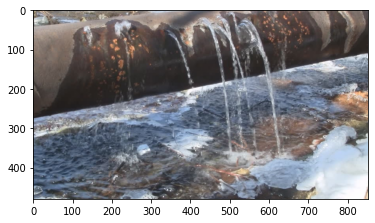

In [6]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [7]:
l=os.listdir(train_corroded)  #list all file name in the directory 
l

['1.png',
 '10.png',
 '100.png',
 '101.png',
 '102.png',
 '103.png',
 '104.png',
 '105.png',
 '106.png',
 '107.png',
 '108.png',
 '109.png',
 '11.png',
 '110.png',
 '111.png',
 '112.png',
 '113.png',
 '114.png',
 '115.png',
 '116.png',
 '117.png',
 '118.png',
 '119.png',
 '12.png',
 '120.png',
 '121.png',
 '122.png',
 '123.png',
 '124.png',
 '125.png',
 '126.png',
 '127.png',
 '128.png',
 '129.png',
 '13.png',
 '130.png',
 '131.png',
 '132.png',
 '133.png',
 '134.png',
 '135.png',
 '136.png',
 '137.png',
 '138.png',
 '139.png',
 '14.png',
 '140.png',
 '141.png',
 '142.png',
 '143.png',
 '144.png',
 '145.png',
 '146.png',
 '147.png',
 '148.png',
 '149.png',
 '15.png',
 '150.png',
 '151.png',
 '152.png',
 '153.png',
 '154.png',
 '155.png',
 '156.png',
 '157.png',
 '158.png',
 '159.png',
 '16.png',
 '160.png',
 '161.png',
 '162.png',
 '163.png',
 '164.png',
 '165.png',
 '166.png',
 '167.png',
 '168.png',
 '169.png',
 '17.png',
 '170.png',
 '171.png',
 '172.png',
 '173.png',
 '18.png',
 '1

In [8]:
len(l)

173

<pre>function train_data perform following operation for both folder corroded and non Corroded:
    1.Iterate through the all files in the folder
    2.join image name with folder path
    3.read image using open CV
    4.Resize the iamge
    5.fltten the 3D array as multi Dimentional array take more space
    6.Finally append in array</pre>

In [9]:
corroded=[] #this will used to store corroded image data
non_corroded=[] #this will used to store non_corroded image data
def train_data():
    for image in tqdm(os.listdir(train_non_corroded)):
        try:
            path=os.path.join(train_non_corroded,image)
            img=cv2.imread(path)
            img=cv2.resize(img,(256,256))
            non_corroded.append(img.flatten())
        except Exception as e:
            print(str(e))
    for image in tqdm(os.listdir(train_corroded)):
        try:
            path=os.path.join(train_corroded,image)
            img=cv2.imread(path)
            img=cv2.resize(img,(256,256))
            corroded.append(img.flatten())
        except Exception as e:
            print(str(e),image)
train_data()

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/173 [00:00<?, ?it/s]

OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
 167.png


In [10]:
y1=np.ones(len(corroded))  #assing one corrospond to corroded image
y0=np.zeros(len(non_corroded))  #assing zero corrospond to non_corroded image

In [11]:
y=np.hstack((y1,y0))  #horizontally stack both

In [12]:
c=np.array(corroded) 
n=np.array(non_corroded)

In [13]:
c.shape

(172, 196608)

In [14]:
n.shape

(56, 196608)

In [15]:
x=np.vstack((c,n)) #vertically stack both

In [16]:
x

array([[163, 181, 190, ..., 183, 212, 228],
       [ 54,  52,  98, ...,  62,  66,  85],
       [ 79,  79,  69, ...,  85,  90,  80],
       ...,
       [100,  57,  30, ...,  41,  90,  74],
       [ 24,  35,  43, ...,  57,  85, 143],
       [249, 254, 252, ..., 134, 150, 143]], dtype=uint8)

In [17]:
y   #output value 1 corrospond to corrodded and 0 corrospond non corroded

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

### Model Training

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.1)

In [19]:
y_train

array([0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       0.])

#### Logistic Regression

In [20]:
lr=LogisticRegression(max_iter=1000)

In [21]:
lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [22]:
lr.score(x_train,y_train)

1.0

In [23]:
cross_val_score(lr,x_train,y_train).mean()

0.7609756097560976

In [24]:
lr.score(x_test,y_test)

0.7391304347826086

#### Decision Tree

In [25]:
DT=DecisionTreeClassifier()

In [26]:
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [27]:
DT.score(x_train,y_train)

1.0

In [28]:
cross_val_score(DT,x_train,y_train).mean()

0.7268292682926829

In [29]:
DT.score(x_test,y_test)

0.6086956521739131

#### Support Vector Machine

In [30]:
svc=SVC()

In [31]:
svc.fit(x_train,y_train)

SVC()

In [32]:
svc.score(x_train,y_train)

0.9804878048780488

In [33]:
cross_val_score(svc,x_train,y_train).mean()

0.7707317073170732

In [34]:
svc.score(x_test,y_test)

0.7391304347826086

###### Achieved max. cv score using svm of 0.77 on traing set and 0.73 on test set

### Prediction Function

In [35]:
def predict(url):
    img=cv2.imread(url)
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    img=cv2.resize(img,(256,256))
    img=img.flatten()
    pred=svc.predict([img])
    
    if pred[0]==1:
        print("CORRODED")
    else:
        print("NOT CORRODED")
    
    

CORRODED


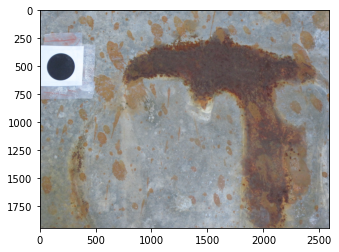

In [36]:
url=r"D:\7th sem\MAJOR PROJECT\Corroded\75.png"
predict(url)